# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'd:\imageclassification\imageclasskernel\scripts\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\irems\\AppData\\Local\\Temp\\pip-install-wc_y1koi\\tensorflow-gpu\\setup.py'"'"'; __file__='"'"'C:\\Users\\irems\\AppData\\Local\\Temp\\pip-install-wc_y1koi\\tensorflow-gpu\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\irems\AppData\Local\Temp\pip-wheel-io2d1m47'
       cwd: C:\Users\irems\AppData\Local\Temp\pip-install-wc_y1koi\tensorflow-gpu\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\irems\AppData\Local\Temp\pip-install-wc_y1koi\tensorflow-gpu\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" pack

In [3]:
pip install tensorflow  opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
cycler                       0.11.0
debugpy                      1.7.0
decorator                    5.1.1
entrypoints                  0.4
flatbuffers                  23.5.26
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.25.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.8.0
idna                         3.6
importlib-metadata           6.7.0
ipykernel                    6.16.2
ipython                      7.34.0
jedi                         0.19.1
joblib                       1.3.2
jupyter-client               7.4.9
j

You should consider upgrading via the 'd:\imageclassification\imageclasskernel\scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
import tensorflow as tf
import os

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [8]:
import cv2
import imghdr

In [9]:
data_dir = 'data' 

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\cloudy\.ipynb_checkpoints
Issue with image data\dew\.ipynb_checkpoints
Issue with image data\fogsmog\.ipynb_checkpoints
Issue with image data\frost\.ipynb_checkpoints
Issue with image data\glaze\.ipynb_checkpoints
Issue with image data\lightning\.ipynb_checkpoints
Issue with image data\rime\.ipynb_checkpoints
Issue with image data\sandstorm\.ipynb_checkpoints
Issue with image data\shine\.ipynb_checkpoints
Issue with image data\snow\.ipynb_checkpoints
Issue with image data\sunrise\.ipynb_checkpoints


# 3. Load Data

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 7929 files belonging to 14 classes.


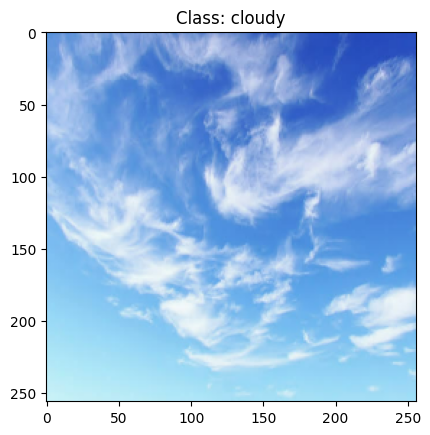

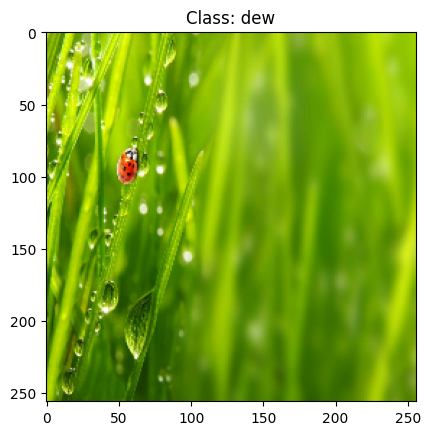

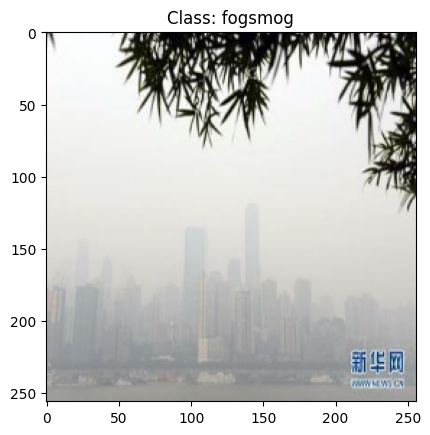

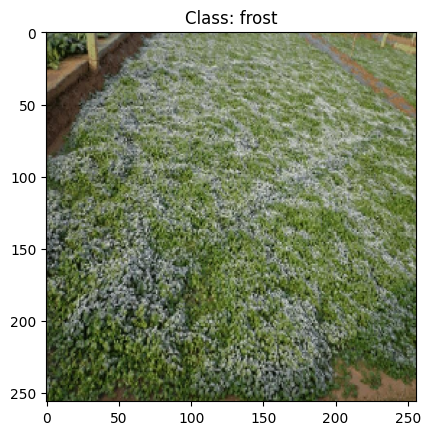

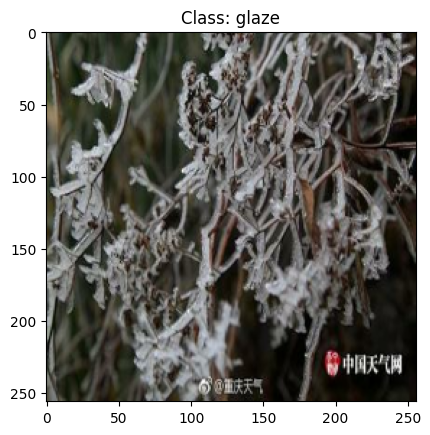

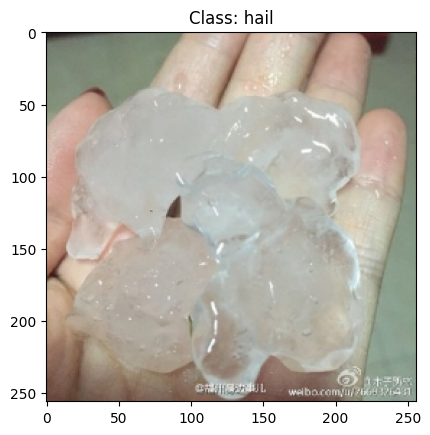

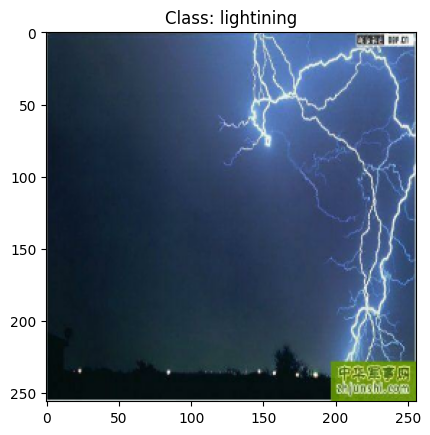

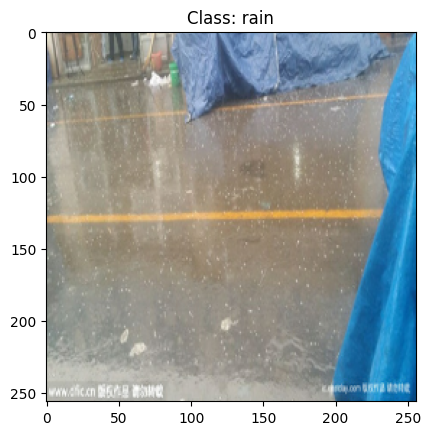

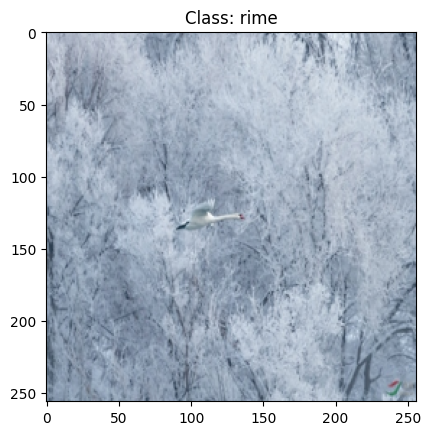

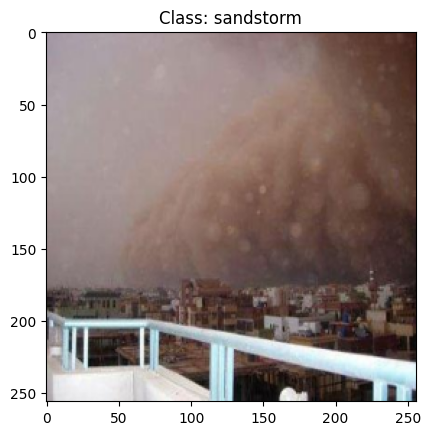

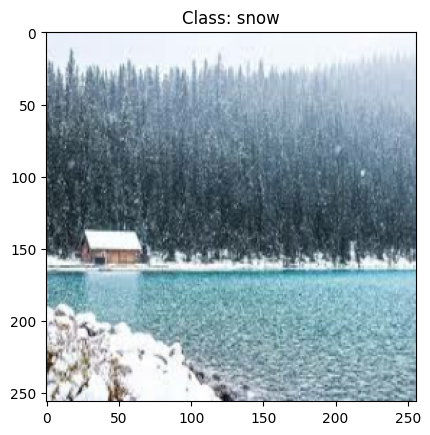

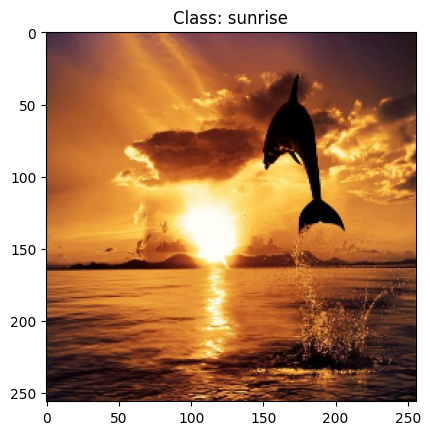

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

data_dir = 'data'
class_labels = ['cloudy', 'dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightining', 'rain', 'rainbow', 'rime', 'sandstorm','shine', 'snow', 'sunrise']

# Veri kümesini oluştur
data = tf.keras.utils.image_dataset_from_directory(data_dir)

# Veri kümesinin bir örnek batch'ini alma
batch = next(iter(data))

# Batch içindeki görüntüler ve etiketler
images, labels = batch

# Her bir sınıf için ilk görüntüyü gösterme
for class_index, class_label in enumerate(class_labels):
    class_indices = tf.where(labels == class_index).numpy().flatten()
    if len(class_indices) > 0:
        image_for_class = images[class_indices[0]]
        plt.imshow(image_for_class.numpy().astype(int))
        plt.title(f'Class: {class_label}')
        plt.show()


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

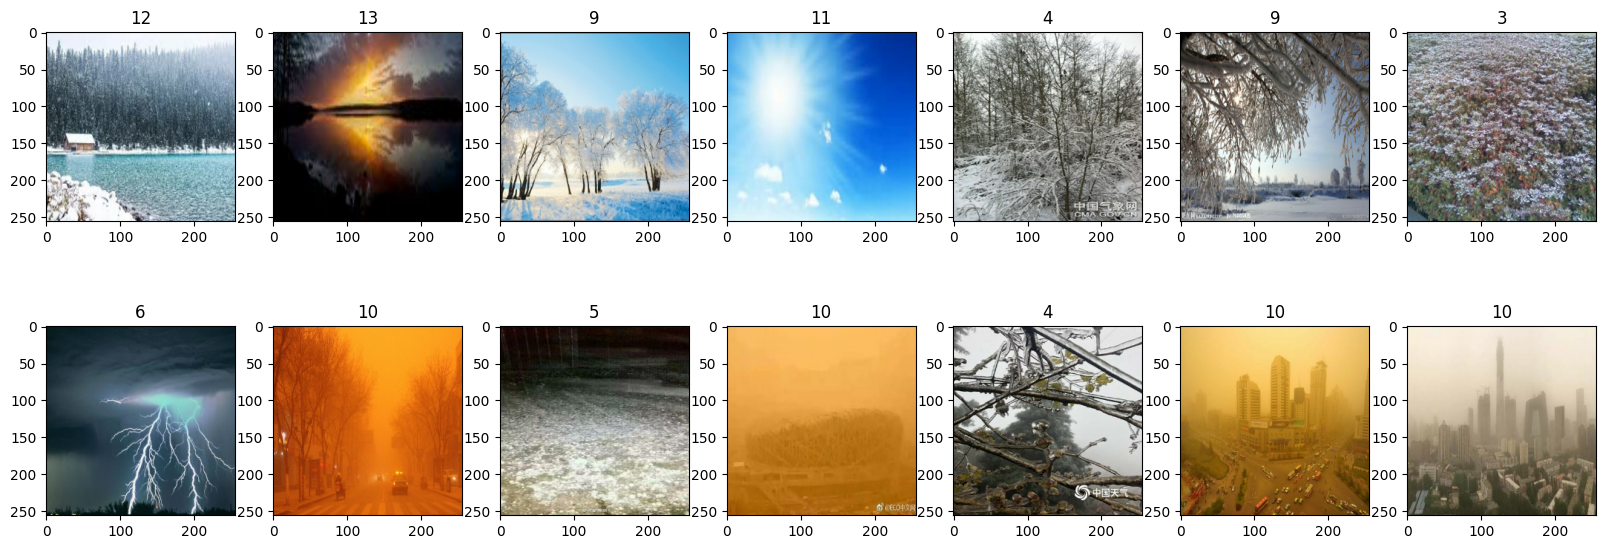

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(20, 7))

# Veri kümesinden 14 resmi gösterme
for i in range(2):
    for j in range(7):
        img_index = i * 7 + j
        if img_index < 14:
            ax[i, j].imshow(batch[0][img_index].astype(int))
            ax[i, j].title.set_text(batch[1][img_index])

plt.show()


# 4. Scale Data

In [49]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [1]:
# Veri setini normalize etme ve one-hot encoding uygulama
data = data.map(lambda x, y: (x / 255, tf.one_hot(y, depth=14)))


NameError: name 'data' is not defined

In [47]:
data[:5]

TypeError: 'MapDataset' object is not subscriptable

In [18]:
data.as_numpy_iterator().next() 

(array([[[[0.6258157 , 0.64150196, 0.65326667],
          [0.6244983 , 0.6401846 , 0.6519493 ],
          [0.5980239 , 0.61371017, 0.6254749 ],
          ...,
          [0.6055645 , 0.6016429 , 0.62125075],
          [0.5565525 , 0.55263096, 0.5722388 ],
          [0.5879251 , 0.5840035 , 0.60361135]],
 
         [[0.6470818 , 0.66276807, 0.6745328 ],
          [0.62646675, 0.642153  , 0.65391773],
          [0.62057674, 0.636263  , 0.6480277 ],
          ...,
          [0.6117417 , 0.60782015, 0.627428  ],
          [0.60489815, 0.6009766 , 0.6205844 ],
          [0.621538  , 0.6176164 , 0.63722426]],
 
         [[0.64209944, 0.6577857 , 0.6695504 ],
          [0.6092141 , 0.6249004 , 0.6366651 ],
          [0.64025354, 0.6559398 , 0.6677045 ],
          ...,
          [0.5813534 , 0.57743186, 0.5970397 ],
          [0.60754824, 0.60362667, 0.6232345 ],
          [0.5879021 , 0.58398056, 0.6035884 ]],
 
         ...,
 
         [[0.72904027, 0.696335  , 0.6852367 ],
          [0.70713

# 5. Split Data

In [19]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

173

In [21]:
val_size

49

In [22]:
test_size

24

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
from collections import Counter
class_labels = ['cloudy', 'dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightining', 'rain', 'rainbow', 'rime', 'sandstorm', 'shine', 'snow', 'sunrise']

# Train setindeki sınıfların örnek sayıları
train_class_counts = Counter([class_labels[np.argmax(label.numpy())] for _, label in train])

# Test setindeki sınıfların örnek sayıları
test_class_counts = Counter([class_labels[np.argmax(label.numpy())] for _, label in test])

print("Train seti sınıf örnek sayıları:")
print(train_class_counts)

print("\nTest seti sınıf örnek sayıları:")
print(test_class_counts)


Train seti sınıf örnek sayıları:
Counter({'rime': 29, 'dew': 18, 'fogsmog': 17, 'hail': 16, 'sandstorm': 16, 'rain': 16, 'snow': 13, 'sunrise': 9, 'lightining': 9, 'glaze': 8, 'frost': 8, 'cloudy': 5, 'shine': 5, 'rainbow': 4})

Test seti sınıf örnek sayıları:
Counter({'fogsmog': 5, 'hail': 4, 'frost': 3, 'glaze': 2, 'rime': 2, 'rain': 2, 'rainbow': 1, 'sunrise': 1, 'dew': 1, 'sandstorm': 1, 'lightining': 1, 'cloudy': 1})


# 6. Build Deep Learning Model

In [25]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 14), dtype=tf.float32, name=None))>

In [26]:
transform_train = transforms.Compose([transforms.ToTensor(),
                                      transforms.RandomRotation(degrees=20),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomVerticalFlip(p=0.005),
                                      transforms.RandomGrayScale(p=0.1),
                                      transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])


SyntaxError: unexpected EOF while parsing (4118532364.py, line 6)

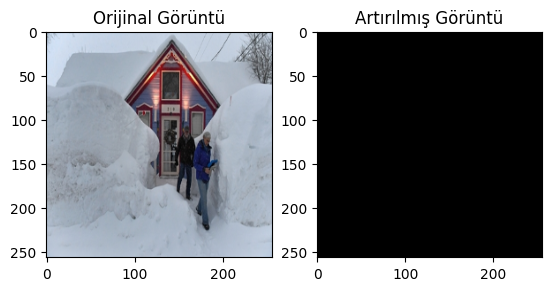

In [27]:
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Veri artırma işlemleri için ImageDataGenerator oluştur
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=0.5,
    vertical_flip=0.005,
    channel_shift_range=0.10,
    brightness_range=(0.3, 0.3),
    #rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Örnek bir görüntü yükleyin (bu, sizin gerçek görüntü yüklemeye uyarlamanız gereken bir yerdir)
image_path = 'data/snow/0853.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Görüntüyü ekrana basmadan önce normalize et
original_image_normalized = original_image / 255.0

# Görüntüyü yeniden boyutlandır (ImageDataGenerator beklediği giriş boyutuna uygun olarak)
original_image_resized = tf.image.resize(original_image_normalized, (256, 256))

# Artırılmış görüntüyü oluştur
augmented_images = datagen.flow(tf.expand_dims(original_image_resized, axis=0), batch_size=1)
augmented_image = augmented_images.next()[0]

# Orijinal ve artırılmış görüntüyü göster
plt.subplot(1, 2, 1)
plt.imshow(original_image_resized.numpy())
plt.title('Orijinal Görüntü')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Artırılmış Görüntü')

plt.show()


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

In [29]:
num_classes = 14 # Toplam sınıf sayısı


In [30]:
model = Sequential()

model.add(BatchNormalization(input_shape=(256, 256, 3)))

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.50))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [31]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [39]:
hist = model.fit(train, epochs=30, validation_data=val,  callbacks=[tensorboard_callback, early_stopping])

Epoch 1/30
173/173 [==============================] - 1117s 6s/step - loss: 2.5320 - accuracy: 0.2009 - val_loss: 2.3537 - val_accuracy: 0.3540
Epoch 2/30
173/173 [==============================] - 656s 4s/step - loss: 2.0850 - accuracy: 0.3307 - val_loss: 1.9686 - val_accuracy: 0.4120
Epoch 3/30
173/173 [==============================] - 650s 4s/step - loss: 1.8687 - accuracy: 0.3820 - val_loss: 1.6614 - val_accuracy: 0.4528
Epoch 4/30
173/173 [==============================] - 664s 4s/step - loss: 1.7282 - accuracy: 0.4191 - val_loss: 1.4955 - val_accuracy: 0.5185
Epoch 5/30
173/173 [==============================] - 684s 4s/step - loss: 1.5840 - accuracy: 0.4518 - val_loss: 1.3247 - val_accuracy: 0.5880
Epoch 6/30
173/173 [==============================] - 659s 4s/step - loss: 1.4562 - accuracy: 0.4852 - val_loss: 1.2560 - val_accuracy: 0.6224
Epoch 7/30
173/173 [==============================] - 684s 4s/step - loss: 1.3759 - accuracy: 0.5114 - val_loss: 1.2510 - val_accuracy: 0.608

# 8. Plot Performance

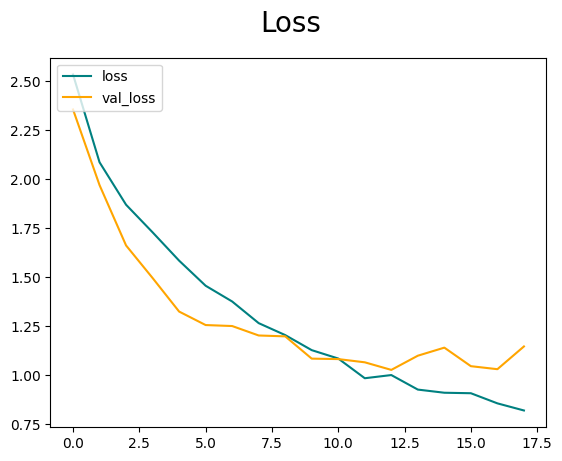

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

# 9. Evaluate

In [42]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy

In [43]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [44]:
test = data.skip(train_size + val_size).take(test_size)

In [45]:
accuracy_metric = Accuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)
    accuracy_metric.update_state(tf.argmax(y, axis=1), tf.argmax(yhat, axis=1))


test_accuracy = accuracy_metric.result().numpy()
print(f'Test Accuracy: {test_accuracy}')

1/1 [==============================] - 0s 328ms/step
Test Accuracy: 0.6770833134651184


In [48]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.6770833, shape=(), dtype=float32)


# 10. Test

In [53]:
import cv2
import matplotlib.pyplot as plt

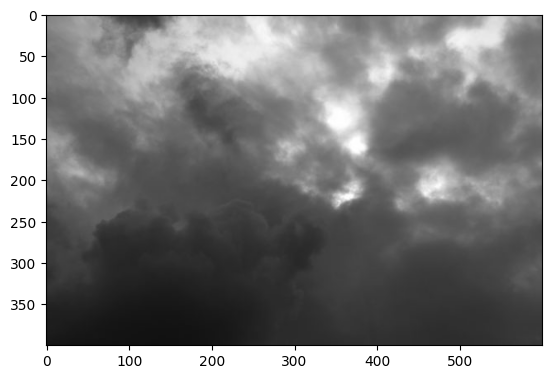

In [42]:
# Görüntüyü okuma ve uygun formatta yükleme
img = cv2.imread('data/cloudy/cloudy1.jpg')

# Görüntü boş mu kontrolü
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında okur, bu nedenle RGB'ye dönüştürüyoruz

    # Görüntüyü gösterme
    plt.imshow(img)
    plt.show()
else:
    print("Görüntü yüklenemedi.")

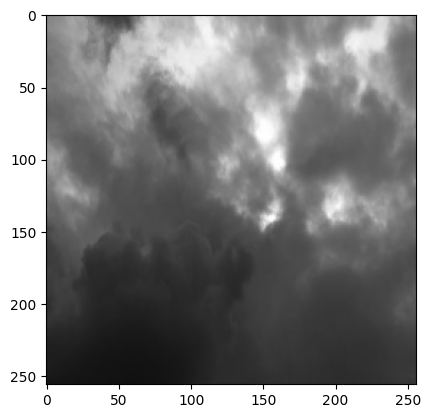

In [43]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


In [81]:
yhat

array([[0.06880816, 0.07835134, 0.06827272, 0.067173  , 0.07427878,
        0.07244373, 0.06232637, 0.07387339, 0.07488263, 0.07457211,
        0.05904985, 0.08339285, 0.07549138, 0.06708368]], dtype=float32)

In [44]:
img_path = 'data/cloudy/cloudy1.jpg'
img = cv2.imread(img_path)

if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resize = tf.image.resize(img, (256, 256))
    resize = np.expand_dims(resize / 255, 0)  

else:
    print(f"Error: Unable to read the image at {img_path}")


In [45]:
class_names = ['cloudy', 'dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'shine', 'snow', 'sunrise']
predictions = model.predict(resize)
predicted_class = np.argmax(predictions, axis=-1)

# Print some debug information
print(f'Predicted class indices: {predicted_class}')
if 0 <= predicted_class[0] < len(class_names):
    predicted_class_label = class_names[predicted_class[0]]
    print(f'Predicted class: {predicted_class_label}')
else:
    print('Error: Predicted class index is out of range.')

# Print class probabilities
for i, prob in enumerate(predictions[0]):
    class_label = class_names[i]
    print(f'Probability for class {class_label}: {prob}')


1/1 [==============================] - 0s 411ms/step
Predicted class indices: [11]
Predicted class: shine
Probability for class cloudy: 0.07127784192562103
Probability for class dew: 0.08188533037900925
Probability for class fogsmog: 0.06789594143629074
Probability for class frost: 0.06217320263385773
Probability for class glaze: 0.06970970332622528
Probability for class hail: 0.07049459964036942
Probability for class lightning: 0.0646197721362114
Probability for class rain: 0.07584801316261292
Probability for class rainbow: 0.07531409710645676
Probability for class rime: 0.07318767160177231
Probability for class sandstorm: 0.06255944818258286
Probability for class shine: 0.0900249257683754
Probability for class snow: 0.07620864361524582
Probability for class sunrise: 0.05880085378885269


# 11. Save the Model

In [36]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','weatherforecast18.h5'))

In [37]:
new_model = load_model('D:\ImageClassification\models\weatherforecast18.h5')

In [38]:
model.load_weights('D:\ImageClassification\models\weatherforecast18.h5')

In [39]:
new_model.predict(np.expand_dims(resize/255, 0))


NameError: name 'resize' is not defined

# 12. Confusion Matrix

In [60]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in d:\imageclassification\imageclasskernel\lib\site-packages (1.0.2)
Requirement already up-to-date: scipy in d:\imageclassification\imageclasskernel\lib\site-packages (1.7.3)
Requirement already up-to-date: matplotlib in d:\imageclassification\imageclasskernel\lib\site-packages (3.5.3)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


In [61]:
!pip install seaborn

You should consider upgrading via the 'd:\imageclassification\imageclasskernel\scripts\python.exe -m pip install --upgrade pip' command.


1/1 [==============================] - 0s 354ms/step


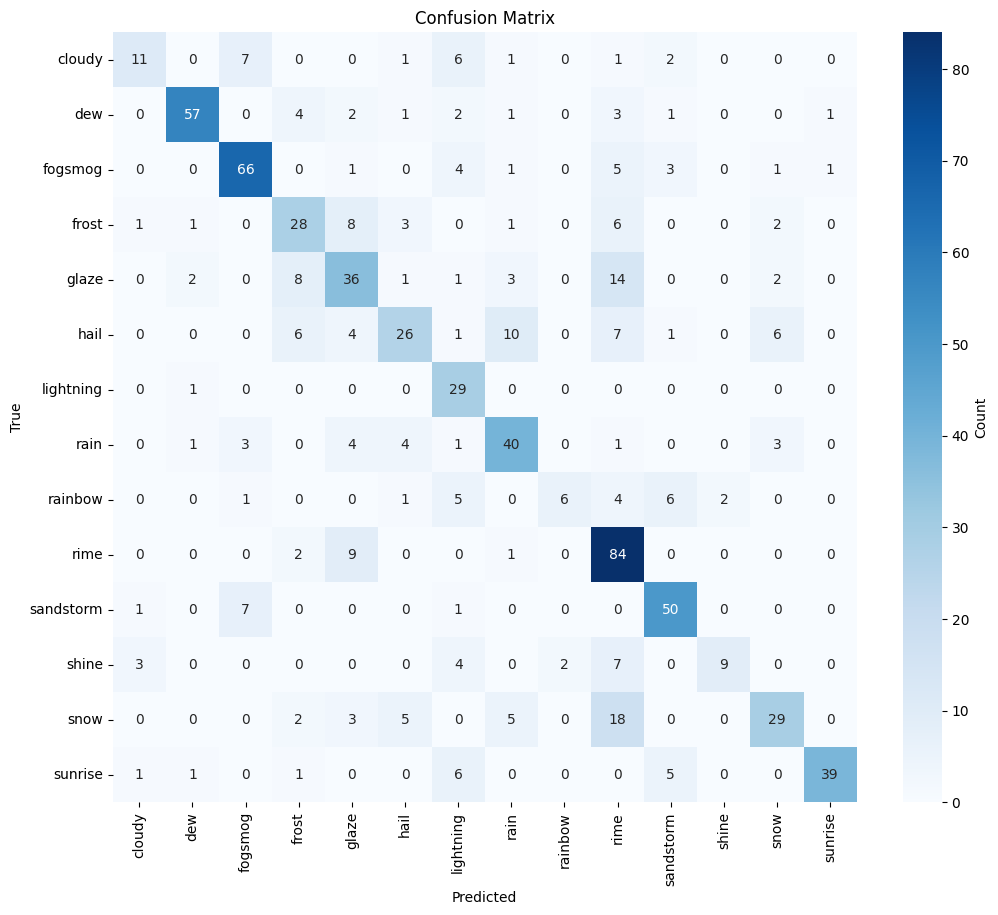

In [62]:
# Confusion Matrix oluşturma ve çizme
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Test veri seti üzerinde tahminlerin ve gerçek etiketlerin toplanması
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # Sınıf indekslerini listeler içinde ekleyin
    y_true.append([np.argmax(label) for label in y])
    y_pred.append([np.argmax(pred) for pred in yhat])

# Listeleri numpy dizilerine çevirme
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Confusion Matrix oluşturma
conf_mat = confusion_matrix(y_true, y_pred)

# Sınıf isimleri
class_names = ['cloudy', 'dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm','shine', 'snow', 'sunrise']

# Pandas DataFrame'e dönüştürme
conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

# Confusion Matrix'i çizme
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat_df, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



